## Homework 4: Data Cleaning and Exploration (50 points)

## Data 119, Winter 2023

**Pandas Cheat Sheet**: There are several Pandas documentation files you can find with a simple search. This is short and informative: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 4 is due on Thursday, 2/2 at 9:00am. Late work will not be accepted.  

In [251]:
# Don't change this cell; just run it. 

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd

## Chicago Divvy Data ##

For this exercise, we downloaded the Chicago Divvy data for the last quarter before the pandemic (Q4 of 2019) from:

https://divvy-tripdata.s3.amazonaws.com/index.html

The map of the system is here:
https://member.divvybikes.com/map/

The list of stations can be found here:
https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq/data

The original dataset has more than 700K rides. The data file for this homework contains only a subset of the rides that started or ended around Hyde Park.

In [252]:
# Don't change this cell; just run it.
# The code assumes that the Bike.csv file is in the same directory as the notebook
bike=pd.read_csv("BikeHW.csv")
bike.head(6)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/2019 13:39,10/7/2019 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
1,25577704,10/27/2019 16:44,10/27/2019 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
2,25823341,12/4/2019 17:24,12/4/2019 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
3,25735449,11/19/2019 18:32,11/19/2019 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
4,25716762,11/16/2019 21:09,11/16/2019 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
5,25647505,11/5/2019 10:18,11/5/2019 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN


### Question 1

The file as provided has some duplicate entries (i.e., duplicate rows). Some useful pandas routines for dealing with duplicates can be found here:
<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
<br><br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

Use pandas to find the number of duplicated rows in the dataset.  How many are there?

In [253]:
## Answer here and in additional cells if needed
num = 0
duplicates = bike.duplicated()
for i in duplicates:
    if i == True:
        num +=1
num

20

### Question 2

Create a data frame called `bikeND` that removes the duplicates and has only unique entries.
Also, calculate the number of unique entries in the `trip_id` column and verify that it is the same as the number of rows.

In [254]:
## Answer here and in additional cells if needed
bikeND = bike.drop_duplicates()
out = len(pd.unique(bikeND['trip_id']))
print(out)
print(np.shape(bikeND)[0])

2438
2438


### Question 3

For this and questions 4 through 8, we will work with the data frame that has unique rows: `bikeND`.

We will now investigate the missing values in the data. Answer these:
1. How many values are missing for each column? 
2. How many rows have one or more missing values?
3. How do missing values differ by user type?


In [255]:
## Answer here and in additional cells if needed
# 1. How many values are missing for each column
null_cols = bikeND.isnull().any(axis='index')
for i in bikeND.columns:
    print(i,':',bikeND[i].isnull().sum())

trip_id : 0
start_time : 2
end_time : 2
bikeid : 0
tripduration : 4
from_station_id : 0
from_station_name : 2
to_station_id : 0
to_station_name : 2
usertype : 0
gender : 206
birthyear : 199


In [256]:
#2. How many rows have one or more missing values?
null_rows = bikeND.isnull().any(axis='columns').sum()
null_rows

214

In [257]:
#3. How do missing values differ by user type?
by_type = bikeND.groupby('usertype')
by_type.head()
bikeND[bikeND.isna().any(axis=1)]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25317046,10/7/2019 13:39,10/7/2019 14:05,4231,1533.0,424,Museum of Science and Industry,355,South Shore Dr & 67th St,Customer,NaN,NaN
5,25647505,11/5/2019 10:18,11/5/2019 10:24,2874,378.0,322,Kimbark Ave & 53rd St,423,University Ave & 57th St,Customer,NaN,NaN
7,25470744,10/18/2019 13:50,10/18/2019 14:16,5418,1540.0,204,Prairie Ave & Garfield Blvd,424,Museum of Science and Industry,Customer,NaN,NaN
12,25600923,10/29/2019 17:49,10/29/2019 17:54,2054,328.0,423,NaN,418,Ellis Ave & 53rd St,Subscriber,Male,1980.0
25,25637010,11/4/2019 12:26,11/4/2019 12:36,3088,598.0,424,Museum of Science and Industry,424,Museum of Science and Industry,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2391,25406994,10/13/2019 17:04,10/13/2019 17:45,3517,2431.0,278,Wallace St & 35th St,424,Museum of Science and Industry,Customer,NaN,NaN
2414,25392644,10/12/2019 13:23,10/12/2019 14:28,5199,3904.0,6,Dusable Harbor,345,Lake Park Ave & 56th St,Customer,NaN,NaN
2418,25719173,11/17/2019 14:43,11/17/2019 15:03,6169,1201.0,426,Ellis Ave & 60th St,419,Lake Park Ave & 53rd St,Customer,NaN,NaN
2447,25450000,10/16/2019 22:52,10/16/2019 23:31,4971,2341.0,248,Woodlawn Ave & 55th St,423,University Ave & 57th St,Customer,NaN,NaN


The majority of rows that have missing values have Customer as their usertype. 

### Question 4


In this question, we will look into recovering some of the missing data. Answer these:

1. Which missing values can be recovered? 
2. For those that can be recovered, impute (i.e., infer) their values.

Hint: station ids versus station names.

In [258]:
## Answer here and in additional cells if needed
#1. Which missing values can be recovered?
print('Values that can be recovered: Station Ids, Station Names')
#2. Infer values that can be recovered
nulls = bikeND.isnull()
check_from = nulls[nulls['from_station_name']==True]
check_to = nulls[nulls['to_station_name']==True]
check_from.head()

Values that can be recovered: Station Ids, Station Names


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
12,False,False,False,False,False,False,True,False,False,False,False,False
175,False,False,False,False,False,False,True,False,False,False,False,False


In [259]:
check_to.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
44,False,False,False,False,False,False,False,False,True,False,False,False
276,False,False,False,False,False,False,False,False,True,False,False,False


In [260]:
print(bikeND.iloc[12].from_station_id)
print(bikeND.iloc[175].from_station_id)
print(bikeND.iloc[44].to_station_id)
print(bikeND.iloc[276].to_station_id)

423
418
426
204


In [261]:
station_ids = bikeND.groupby(['from_station_id','from_station_name']).count()
station_ids

,,trip_id,start_time,end_time,bikeid,tripduration,to_station_id,to_station_name,usertype,gender,birthyear
from_station_id,from_station_name,,,,,,,,,,
2,Buckingham Fountain,3,3,3,3,3,3,3,3,0,0
3,Shedd Aquarium,1,1,1,1,1,1,1,1,1,1
4,Burnham Harbor,9,9,9,9,9,9,9,9,9,9
5,State St & Harrison St,1,1,1,1,1,1,1,1,0,0
6,Dusable Harbor,2,2,2,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
556,Throop St & 52nd St,1,1,1,1,1,1,1,1,1,1
581,Commercial Ave & 83rd St,1,1,1,1,1,1,1,1,0,0
594,Western Blvd & 48th Pl,1,1,1,1,1,1,1,1,0,0


In [262]:
bikeND['from_station_name'][12] = station_ids.loc[bikeND.iloc[12].from_station_id].index[0]
bikeND['from_station_name'][175] = station_ids.loc[bikeND.iloc[175].from_station_id].index[0]
bikeND['to_station_name'][44] = station_ids.loc[bikeND.iloc[44].to_station_id].index[0]
bikeND['to_station_name'][276] = station_ids.loc[bikeND.iloc[276].to_station_id].index[0]
bikeND.loc[44]

C:\Users\ja123\AppData\Local\Temp\ipykernel_9184\2577132280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeND['from_station_name'][12] = station_ids.loc[bikeND.iloc[12].from_station_id].index[0]
C:\Users\ja123\AppData\Local\Temp\ipykernel_9184\2577132280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeND['from_station_name'][175] = station_ids.loc[bikeND.iloc[175].from_station_id].index[0]
C:\Users\ja123\AppData\Local\Temp\ipykernel_9184\2577132280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

trip_id                              25601662
start_time                   10/29/2019 18:23
end_time                     10/29/2019 18:27
bikeid                                    486
tripduration                            248.0
from_station_id                           423
from_station_name    University Ave & 57th St
to_station_id                             426
to_station_name           Ellis Ave & 60th St
usertype                           Subscriber
gender                                   Male
birthyear                              2000.0
Name: 44, dtype: object

### Question 5

Some rows have a missing trip duration.  What do those rows have in common and what is a possible explination for why they are missing data?


In [263]:
## Answer here and in additional cells if needed
bikeND[bikeND['tripduration'].isna()]

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
255,25660296,11/6/2019 16:01,NaN,3505,NaN,322,Kimbark Ave & 53rd St,168,Michigan Ave & 14th St,Subscriber,Male,1963.0
532,25581803,NaN,10/28/2019 8:14,5752,NaN,168,Michigan Ave & 14th St,328,Ellis Ave & 58th St,Subscriber,Male,1963.0
613,25303810,NaN,10/6/2019 16:34,4932,NaN,168,Michigan Ave & 14th St,422,DuSable Museum,Customer,NaN,NaN
838,25615817,11/1/2019 14:52,11/1/2019 14:56,1782,NaN,322,Kimbark Ave & 53rd St,420,Ellis Ave & 55th St,Subscriber,Male,1997.0


The first three rows shown above are missing a start time or end time. The last row has both and may just be a data entry error. 

### Question 6

Print the row that has the longest trip. Before that, investigate the data types for the columns to make sure trip duration is numerical.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [264]:
## Answer here and in additional cells if needed
print(bikeND.dtypes)
print('Longest Trip: ',bikeND.sort_values('tripduration',ascending=False).iloc[0])

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object
Longest Trip:  trip_id                                    25575836
start_time                         10/27/2019 15:12
end_time                           10/28/2019 14:09
bikeid                                         1187
tripduration                                82667.0
from_station_id                                 424
from_station_name    Museum of Science and Industry
to_station_id                                   653
to_station_name               Cornell Dr & Hayes Dr
usertype                                   Customer
gender                                          NaN
birthyear                                       NaN

### Question 7

Investigate if trip durations have similar distributions for male and female riders using a visualization. Create a graph that is useful for this comparison.

In [462]:
## Answer here and in additional cells if needed
pure_bike = bikeND.dropna()
male = pure_bike[pure_bike['gender']== 'Male'].sort_values('tripduration', ascending=False)
clean_male = male.iloc[40: ,:]
female = pure_bike[pure_bike['gender']=='Female'].sort_values('tripduration',ascending=False)
clean_female = female.iloc[40:,:]

{'whiskers': [<matplotlib.lines.Line2D at 0x2b80a2827c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b80a282d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b80a282550>,
 'medians': [<matplotlib.lines.Line2D at 0x2b80a28f340>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b80a28f610>,
 'means': []}

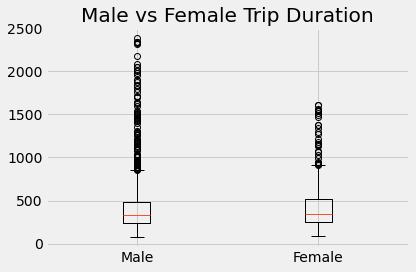

In [463]:
fig1, ax1 = plots.subplots()
ax1.set_title('Male vs Female Trip Duration')

ax1.boxplot([clean_male.tripduration,clean_female.tripduration],labels = ['Male','Female'])

Male and Female trip durations do appear to have similar distributions and the median values of each group falls within the box of the other suggesting that gender does not heavily affect trip duration. 

### Question 8

Next we want to investigate the impact of age on trip duration. 
It appears that some rows have a default (impossible) value for the `birthyear` column and others are simply missing data for `birthyear`.
Create a new dataframe called `bikeClean` that has the offending rows removed (i.e., where all the rows have valid `birthyear` information).

Hint: the oldest valid bike rider in the dataset was born in 1921

Use the `bikeClean` dataframe for the remaining questions.



In [266]:
## Answer here and in additional cells if needed
bikeClean = bikeND[bikeND['birthyear']>=1921]
bikeClean = bikeClean[bikeClean['birthyear']<2019]
bikeClean = bikeClean[bikeClean['birthyear'].notna()].reset_index()
bikeClean.head()

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,1,25577704,10/27/2019 16:44,10/27/2019 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0
1,2,25823341,12/4/2019 17:24,12/4/2019 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0
2,3,25735449,11/19/2019 18:32,11/19/2019 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0
3,4,25716762,11/16/2019 21:09,11/16/2019 21:19,1993,633.0,322,Kimbark Ave & 53rd St,426,Ellis Ave & 60th St,Subscriber,Male,2001.0
4,6,25360277,10/9/2019 18:02,10/9/2019 18:07,5967,333.0,322,Kimbark Ave & 53rd St,420,Ellis Ave & 55th St,Subscriber,Male,1998.0


### Question 9

Using `bikeClean`, create a variable that indicates who is born in the years 1997-2001 (proxy for college students in this data set) versus born in other years. Similarly to Question 7, investigate if trip durations have similar distributions for the two age groups using visualization. |


In [345]:
## Answer here and in additional cells if needed

bikeClean['college'] = np.zeros(len(bikeClean['birthyear']))
for i in range(len(bikeClean['birthyear'])):
    if bikeClean['birthyear'][i]<=2001 and bikeClean['birthyear'][i]>=1997:
        bikeClean['college'][i] = 1

college = bikeClean[bikeClean['college']==0]
older = bikeClean[bikeClean['college']==1] 

C:\Users\ja123\AppData\Local\Temp\ipykernel_9184\2936861597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikeClean['college'][i] = 1


In [350]:
college = college.sort_values('tripduration', ascending=False)
older = older.sort_values('tripduration',ascending=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b801087790>,
 'caps': [<matplotlib.lines.Line2D at 0x2b801087430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b801087bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x2b802358f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b802358670>,
 'means': []}

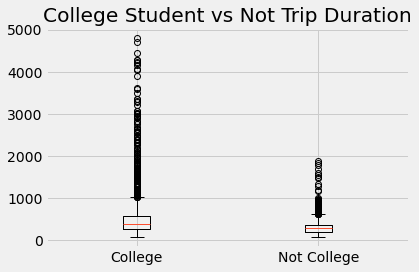

In [369]:
fig1, ax1 = plots.subplots()
ax1.set_title('College Student vs Not Trip Duration')

college = college[college['tripduration'].notna()]
show_college = college.iloc[10:,:]
older = older[older['tripduration'].notna()]
show_older = older.iloc[10:,:]
ax1.boxplot([show_college.tripduration,show_older.tripduration],labels = ['College','Not College'])

The distributions are not the same for each agegroup. It appears that there are many more college students who take longer trips than non-college students. Nevertheless, the medians of each group are similar, indicating that college students just tend to have more outliers who go long distances. 

### Question 10

Extract day of the week from `start_time` and look at trip duration by day of the week. Create a plot that summarizes your findings.

Hint. Options for extracting day of the week:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html


In [438]:
## Answer here and in additional cells if needed
from datetime import datetime
def combine_event_datetimes(df):
    combined = pd.to_datetime(
        # Combine date and time strings
       df['start_time'],
        infer_datetime_format=True,
    )
    return df.assign(EVENTDTM=combined)

work = bikeClean.pipe(combine_event_datetimes)
work['DOW'] = work['EVENTDTM'].dt.dayofweek
work.head(3)

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,college,DOW,EVENTDTM
0,1,25577704,10/27/2019 16:44,10/27/2019 16:49,523,283.0,345,Lake Park Ave & 56th St,423,University Ave & 57th St,Subscriber,Male,1989.0,0.0,6.0,2019-10-27 16:44:00
1,2,25823341,12/4/2019 17:24,12/4/2019 17:32,376,486.0,423,University Ave & 57th St,419,Lake Park Ave & 53rd St,Subscriber,Male,1993.0,0.0,2.0,2019-12-04 17:24:00
2,3,25735449,11/19/2019 18:32,11/19/2019 18:35,5708,174.0,248,Woodlawn Ave & 55th St,322,Kimbark Ave & 53rd St,Subscriber,Male,1998.0,1.0,1.0,2019-11-19 18:32:00


In [451]:
work = work[work['tripduration'].notna()]
awork = work.sort_values('tripduration',ascending=False).iloc[10:,:]
mon = awork[awork['DOW']==0]
tue = awork[awork['DOW']==1]
wed = awork[awork['DOW']==2]
thu = awork[awork['DOW']==3]
fri = awork[awork['DOW']==4]
sat = awork[awork['DOW']==5]
sun = awork[awork['DOW']==6]

{'whiskers': [<matplotlib.lines.Line2D at 0x2b80a12abe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b80a1371c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b80a12a910>,
 'medians': [<matplotlib.lines.Line2D at 0x2b80a137640>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b80a137910>,
 'means': []}

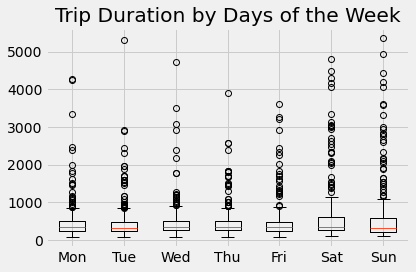

In [460]:
fig1, ax1 = plots.subplots()
ax1.set_title('Trip Duration by Days of the Week')

ax1.boxplot([mon.tripduration,tue.tripduration,wed.tripduration,thu.tripduration,fri.tripduration,sat.tripduration,sun.tripduration],\
            labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

The boxplots seem evenly distributed based on days of the week. All the medians lie within the range of the other boxes suggesting that the trip duration is not heavily correlated with the day of the week. Also each day has many outliers that have higher trip durations than the rest of the sample. 

### Question 11

Find the most popular date for bike riding in this dataset.

In [455]:
## Answer here and in additional cells if needed
work.groupby('DOW').count().sort_values('index', ascending=False)

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,college,EVENTDTM
DOW,,,,,,,,,,,,,,,
1.0,386,386,386,386,386,386,386,386,386,386,386,386,386,386,386
0.0,353,353,353,353,353,353,353,353,353,353,353,353,353,353,353
3.0,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347
2.0,327,327,327,327,327,327,327,327,327,327,327,327,327,327,327
4.0,321,321,321,321,321,321,321,321,321,321,321,321,321,321,321
6.0,269,269,269,268,269,269,269,269,269,269,269,269,269,269,269
5.0,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226


In [457]:
work.groupby('EVENTDTM').count().sort_values('index',ascending=False)

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,college,DOW
EVENTDTM,,,,,,,,,,,,,,,
2019-12-11 17:47:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-12-09 18:12:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-10-17 16:14:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-12-05 10:40:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2019-10-18 16:43:00,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-18 19:18:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-10-18 19:06:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-10-18 18:59:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The most popular day to go bike riding appears to be tuesdays, with 33 more riders than the next highest, mondays, reported in this sample. It's hard to say if there is a day in the year in particular as many days are tied for the most entries in the data.

### Question 12

Ask an interesting question that you could answer with these data and **then provide a data-based answer to your question.** 

(For example, "What was the most popular date for bike riding in this dataset?" - of course you can't use this one since it's already been asked and answered above.)

In [459]:
## Answer here and in additional cells if needed
#Question: What is the most popular destination to bike to?
bikeClean.groupby('to_station_name').count().sort_values('index',ascending=False)

,index,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,usertype,gender,birthyear,college,DOW
to_station_name,,,,,,,,,,,,,,
University Ave & 57th St,389,389,389,389,389,389,389,389,389,389,389,389,389,389
Ellis Ave & 55th St,265,265,265,265,265,264,265,265,265,265,265,265,265,265
Ellis Ave & 60th St,254,254,254,254,254,254,254,254,254,254,254,254,254,254
Kimbark Ave & 53rd St,214,214,214,214,214,214,214,214,214,214,214,214,214,214
Ellis Ave & 58th St,176,176,175,176,176,175,176,176,176,176,176,176,176,175
Lake Park Ave & 56th St,138,138,138,138,138,138,138,138,138,138,138,138,138,138
Woodlawn Ave & 55th St,136,136,136,136,136,136,136,136,136,136,136,136,136,136
Harper Ave & 59th St,132,132,132,132,132,132,132,132,132,132,132,132,132,132
Ellis Ave & 53rd St,111,111,111,111,111,111,111,111,111,111,111,111,111,111


The most popular destination for people to bike to according to the data is University Ave & 57th st, which has 124 more entries than the next most popular, Ellis Ave & 55th St. 